In [109]:
from bs4 import BeautifulSoup
import requests
import quandl
import datetime
import fix_yahoo_finance as yf

In [99]:
# get the information for the JSE
page = requests.get('https://en.wikipedia.org/wiki/List_of_companies_traded_on_the_JSE')

In [100]:
page.text[0:200]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of companies traded on the JSE - Wikipedia</title>\n<script>document.documentElement.className '

In [101]:
soup = BeautifulSoup(page.text, 'lxml')

In [102]:
tickers = []
for table in soup.findAll('table', {'class': 'wikitable sortable'}):
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.strip()
        tickers.append(ticker)

In [103]:
tickers = list(filter(None, tickers)) # fastest way to remove the empty elements '' in the the list 

In [104]:
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

In [105]:
tickers[0]

'ABSAB'

In [106]:
tickers = list(filter(None, tickers)) # fastest way to remove the empty elements '' in the the list 

In [132]:
data = yf.download("SPY", start=start, end=end) 

[*********************100%***********************]  1 of 1 downloaded


In [170]:
data.rename(columns={'Adj Close':"SPY"},inplace=True)

In [173]:
import bs4 as bs
import requests
import pickle


def GetListOfTickers(Refresh=False):
    ''' This function gets us the list of stocks from S&P500 and '''
    ''' stores it in a list for later consumption'''

    if Refresh==True:
        try:
            resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
            soup = bs.BeautifulSoup(resp.text, 'lxml')
            table = soup.find('table', {'class': 'wikitable sortable'})
            tickers = []
            for row in table.findAll('tr')[1:]:
                ticker = row.findAll('td')[0].text
                tickers.append(ticker)
            with open("sp500tickers.pickle", "wb") as f:
                pickle.dump(tickers, f)
        except:
            tickers = ["error in extraction process, check wikipedia source"]
    else:
        try:
            with open("sp500tickers.pickle", "rb") as f:
                tickers = pickle.load(f)
        except:
             tickers = "Tickers files does not exist; please run with Refresh=True"
    return tickers

tickers = GetListOfTickers(Refresh=False)


In [229]:
import datetime as dt
import os
import quandl
quandl.ApiConfig.api_key = '7U4XM3-WQBjPgMFmbPtD'

startDate=dt.date(2017,1,30)
endDate=dt.date.today()

start = startDate
end = endDate

print(start)
print(end)

2017-01-30
2018-11-02


In [300]:
path = '/Users/atishparshotam/Google Drive/Git/JunkJuice/Data/Stock_Price'
Tickers = ['AAPL','MMM','AMD']
for ticker in Tickers:
    # just in case your connection breaks, we'd like to save our progress!
            
    if not os.path.exists('Data/Stock_Price/{}.csv'.format(ticker)):
        df = quandl.get("WIKI/" + ticker, start_date=startDate, end_date=endDate)
        # df.reset_index(inplace=True)
        # df.set_index("Date", inplace=True)
        # df = df.drop("Symbol", axis=1)
        df=df[['Adj. Close']]
        df.columns=[ticker]
        df.to_csv(os.path.join(path,r'{}.csv'.format(ticker)))

In [302]:
main_df = pd.DataFrame()
for ticker in Tickers:
            # just in case your connection breaks, we'd like to save our progress!
                    
            if not os.path.exists('Data/Stock_Price/{}.csv'.format(ticker)):
                df = quandl.get("WIKI/" + ticker, start_date=startDate, end_date=endDate)
                df=df[['Adj. Close']]
                df.columns=[ticker]
                print("Writing file for :" + ticker)
                df.to_csv(os.path.join(path,r'{}.csv'.format(ticker)))
            else:
                print('Already have {}'.format(ticker))

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            print(main_df.head())

Writing file for :AAPL
                  AAPL
Date                  
2017-01-30  120.127692
2017-01-31  119.851150
2017-02-01  127.159749
2017-02-02  126.942467
2017-02-03  127.485673
Writing file for :MMM
                  AAPL         MMM
Date                              
2017-01-30  120.127692  172.249477
2017-01-31  119.851150  171.660322
2017-02-01  127.159749  172.003996
2017-02-02  126.942467  171.031889
2017-02-03  127.485673  171.876345
Writing file for :AMD
                  AAPL         MMM    AMD
Date                                     
2017-01-30  120.127692  172.249477  10.61
2017-01-31  119.851150  171.660322  10.37
2017-02-01  127.159749  172.003996  12.06
2017-02-02  126.942467  171.031889  12.28
2017-02-03  127.485673  171.876345  12.24


In [310]:
main_df.head(5)

,AAPL,MMM,AMD
Date,,,
2017-01-30,120.127692,172.249477,10.61
2017-01-31,119.851150,171.660322,10.37
2017-02-01,127.159749,172.003996,12.06
2017-02-02,126.942467,171.031889,12.28
2017-02-03,127.485673,171.876345,12.24


In [312]:
main_df.corr()

,AAPL,MMM,AMD
AAPL,1.000000,0.847934,-0.521014
MMM,0.847934,1.000000,-0.246251
AMD,-0.521014,-0.246251,1.000000


          AAPL       MMM       AMD
AAPL  1.000000  0.847934 -0.521014
MMM   0.847934  1.000000 -0.246251
AMD  -0.521014 -0.246251  1.000000


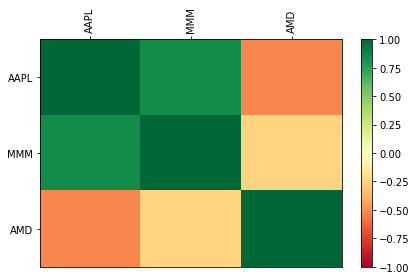

In [319]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline

def visualize_data():
    #df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = main_df.corr()
    print(df_corr.head())
#    df_corr.to_csv('sp500corr.csv')

    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()

visualize_data()

In [2]:



# we can only use the S&P500 as Quandal is limited in this regard
# Ideally we would want to use Bloomberg API in the final version

import bs4 as bs
import requests
import pickle
import datetime as dt
import os
import quandl
quandl.ApiConfig.api_key = '7U4XM3-WQBjPgMFmbPtD'
import pandas as pd

    
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#%matplotlib inline






def GetListOfTickers(Refresh=False):
    ''' This function gets us the list of stocks from S&P500 and '''
    ''' stores it in a list for later consumption'''
    path = '/Users/atishparshotam/Google Drive/Git/JunkJuice/Data'
    if Refresh==True:
        try:
            resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
            soup = bs.BeautifulSoup(resp.text, 'lxml')
            table = soup.find('table', {'class': 'wikitable sortable'})
            tickers = []
            for row in table.findAll('tr')[1:]:
                ticker = row.findAll('td')[0].text
                tickers.append(ticker)
            with open('sp500tickers.pickle', 'wb') as f:
                pickle.dump(tickers, f)
        except:
            tickers = ["error in extraction process, check wikipedia source"]
    else:
        try:
            with open('sp500tickers.pickle', 'rb') as f:
                tickers = pickle.load(f)
        except:
             tickers = "Tickers files does not exist; please run with Refresh=True"
    return tickers






def GetTickerPrice(Refresh=False, Tickers=[],startDate=dt.date(2010,1,1),endDate=dt.date.today()):
    ''' This function gets us price information using Quandal'''
    ''' we pass in the tickers information from GetListOfTickers ie'''
    ''' tickers and we get a list of csv files over a date range '''
    ''' each stock is stored in its own directory in csv format'''
    ''' pass in start and end date using dt.datetime(YYYY,MM,CC) format'''
    
    #start = dt.datetime(2000,01,01)
    #end = dt.datetime(2000,01,01)
    path = '/Users/atishparshotam/Google Drive/Git/JunkJuice/Data/Stock_Price'

    if Refresh==True:
        # get the table for daily stock prices and,
        # filter the table for selected tickers, columns within a time range
        # set paginate to True because Quandl limits tables API to 10,000 rows per call
        try:       
            main_df = pd.DataFrame()
            for ticker in Tickers:
                # just in case your connection breaks, we'd like to save our progress!
                        
                if not os.path.exists('Data/Stock_Price/{}.csv'.format(ticker)):
                    df = quandl.get("WIKI/" + ticker, start_date=startDate, end_date=endDate)
                    df=df[['Adj. Close']]
                    df.columns=[ticker]
                    print("Writing file for :" + ticker)
                    df.to_csv(os.path.join(path,r'{}.csv'.format(ticker)))
                else:
                    print('Already have {}'.format(ticker))

                if main_df.empty:
                    main_df = df
                else:
                    main_df = main_df.join(df, how='outer')

            print(main_df.head(3))
            
        except:
            print( 'Ticker file ' + str(ticker) + ' had an error in extraction')
            pass
            #return(main_df)
    else:
        #read all directory and CSV files.

        try:
            main_df = pd.DataFrame()
            for count, ticker in enumerate(Tickers):
                df = pd.read_csv(os.path.join(path,r'{}.csv'.format(ticker)))
                df.set_index('Date', inplace=True)

              #  df.rename(columns={'Adj Close': ticker}, inplace=True)
              #  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

                if main_df.empty:
                    main_df = df
                else:
                    main_df = main_df.join(df, how='outer')

                if count % 10 == 0:
                    print(count)
            print(main_df.head(3))
        except:
            print( 'Ticker file ' + str(ticker) + ' does not exist; please run with Refresh=True')
            pass
        return(main_df)



def GetTickerFundamental(Refresh=False, startDate=dt.date(2010,1,1),endDate=dt.date.today()):
    ''' This function gets us price information using Quandal'''
    ''' we pass in the tickers information from GetListOfTickers ie'''
    ''' tickers and we get a list of csv files over a date range '''
    ''' each stock is stored in its own directory in csv format'''
    ''' pass in start and end date using dt.datetime(YYYY,MM,CC) format'''

    path = '/Users/atishparshotam/Google Drive/Git/JunkJuice/Data/Fundamental'
    FundamentalDF = pd.DataFrame()
    for count, ticker in enumerate(tickers):        
        df = pd.read_csv(os.path.join(path,r'{}_quarterly_financial_data.csv'.format(ticker)))
        df.set_index('Quarter end', inplace=True)

        #df.rename(columns={'Adj Close': ticker}, inplace=True)
        #df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if FundamentalDF.empty:
            FundamentalDF = df
        else:
            FundamentalDF = FundamentalDF.join(df, how='outer')

        if count % 10 == 0:
                print(count)
        print(FundamentalDF.head(5))
    return(FundamentalDF)



def visualize_data(input_df):
    #df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = input_df.corr()
    print(df_corr.head())

    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()



def process_data_for_labels(tickers,inDataFrame,days_forward=90):
    #hm_days = days_forward
    #df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    #tickers = df.columns.values.tolist()
    inDataFrame.fillna(0, inplace=True)

    for i in range(1,days_forward+1):
        print()
        inDataFrame['{}_{}d'.format(ticker,i)] = (inDataFrame[ticker].shift(-i) - inDataFrame[ticker]) / inDataFrame[ticker]

    inDataFrame.fillna(0, inplace=True)
    return tickers, inDataFrame



tickers = GetListOfTickers(Refresh=False)
print(tickers)
price_df = GetTickerPrice(Refresh=False,Tickers=tickers)
#print(price_df)
#Fundamental_df = GetTickerFundamental(Refresh=False)
#visualize_data(price_df)
#ticker,pricedf = process_data_for_labels(price_df)



['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX

KeyError: 'ANET'

In [25]:
price_df = GetTickerPrice(Refresh=False,Tickers=tickers)

0
10
20
30
40
50
Ticker file ANET does not exist; please run with Refresh=True


In [27]:
days_forward=90

price_df.fillna(0, inplace=True)
for ticker in tickers[1:3]:
#    for i in range(1,days_forward+1):
    price_df['{}_{}d'.format(ticker,i)] = (price_df[ticker].shift(-i) - price_df[ticker]) / price_df[ticker]
    print(ticker)
price_df.fillna(0, inplace=True)



print(tickers[1:3])
print(i)

ABT
ABBV
['ABT', 'ABBV']
90


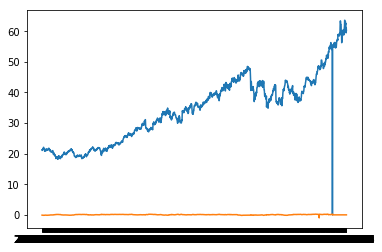

In [34]:
plt.plot(price_df[['ABT','ABT_90d']])
plt.show()